In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver
# %matplotlib notebook

## Solving TSP with different IP formulations

In this notebook, we are going to demostrate the efficiency of different IP formulations for solving the TSP. Including
- DFJ formulation
    - Lazy cut (when we find a violation of subtour constraint, add the lazy cut and go on)
    - Plain loop (when we find a violation of subtour constraint, restart the IP)
- MTZ formulation
- Multi-commodity formulation
- Shortest path formulation (or time-staged formulation)
- Quadratic formulation

### 0. Preparation
In this section, we will randomly generate TSP instances

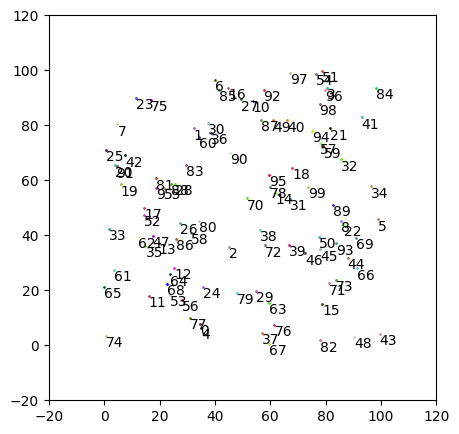

In [7]:
# Generate and plot instance
nodes = vrpSolver.rndNodes(
    N = 100,
    distr = 'UniformSquareXY',
    xRange = (0, 100),
    yRange = (0, 100)
)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)

### 1. DFJ formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} c_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V \label{TSP:con:degree1}\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V \label{TSP:con:degree2}\\
				      & \sum_{j\notin S, i\in S, (i,j)\in A} x_{ij} \ge 1, \quad \forall S \subset V, 2\le |S| \le n-1 \label{TSP:con:DFJSubtour1}\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A   
\end{align}




In [11]:
# DFJ with lazy cut
for i in range(1, 100):
    nodes = vrpSolver.rndNodes(
        N = 100,
        distr = 'UniformSquareXY',
        xRange = (0, 100),
        yRange = (0, 100)
    )
    DFJ_Lazy = vrpSolver.solveTSP(
        nodes = nodes, 
        edges = 'Euclidean',
        algo = 'IP',
        fml = 'DFJ_Lazy',
        solver = 'Gurobi',
        detailsFlag = False,
        outputFlag = False)
    print(DFJ_Lazy['runtime'])

1.3140220642089844
1.4301376342773438
1.2412490844726562
0.9045486450195312
1.7862224578857422
2.265512466430664
4.764749526977539
0.6631946563720703
1.6854572296142578
1.119577407836914
3.9886226654052734
1.7030601501464844
1.9388465881347656
1.336019515991211
2.013612747192383
5.922994613647461
1.7416057586669922
1.461324691772461
2.4304981231689453
1.6422615051269531
1.0647220611572266
5.316850662231445
1.5165157318115234
1.8889122009277344
5.593683242797852
1.1355552673339844
4.042877197265625
1.6512107849121094
2.021991729736328
0.9883193969726562
4.282670974731445
2.4918785095214844
1.2638816833496094
1.4780082702636719
1.0028743743896484
3.4758663177490234
1.1698722839355469
1.9087543487548828
4.1307525634765625
0.9926300048828125
2.348939895629883
1.631296157836914
1.9892425537109375
0.9773521423339844
3.564239501953125
1.3693008422851562
1.6731014251708984
4.451610565185547
5.534858703613281
3.1521072387695312
1.4457168579101562
2.302865982055664
0.6522541046142578
3.213729858

In [24]:
# Plot the result of TSP
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes, 
    nodeSeq = DFJ_Lazy['seq'])

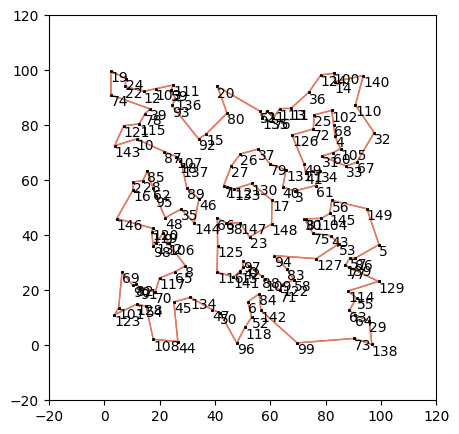

In [25]:
fig

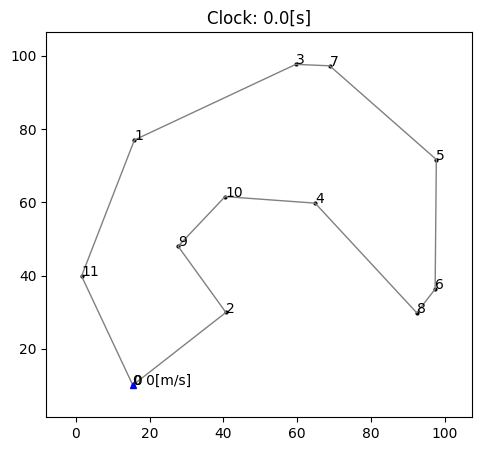

In [6]:
ani = vrpSolver.aniRouting(
    timeRange = [0, DFJ_Lazy['ofv'] + 10],
    nodes = nodes,
    vehicles = DFJ_Lazy['vehicles'],
    speed = 50,
    fps = 20,
    aniSavePath = 'TSP')

In [ ]:
# DFJ with plain loop
DFJ_Plainloop = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'DFJ_Plainloop',
    solver = 'Gurobi',
    outputFlag = False,
    timeLimit = 3)
print(DFJ_Plainloop)

The following figure shows the result for TSP, since every formulation will yield to the same result, we are not going to repeat this part

### 2. MTZ formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

Define $t_i$ as the time of visisting vertex $i$

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} c_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V\\
					  & t_i + \tau_{ij} \le t_j  + M(1 - x_{ij}), \quad i, j = 2, \cdots, n \in V, (i, j) \in A\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A\\
					  & t_i \ge 0, \quad i \in 1, \cdots, n \in V
\end{align}


In [4]:
# MTZ
MTZ = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'MTZ',
    solver = 'Gurobi',
    outputFlag = False,
    timeLimit = 10)
print(MTZ)

{'ofv': 919.6133610848182, 'seq': [0, 131, 17, 109, 145, 58, 86, 117, 3, 55, 121, 126, 92, 20, 129, 67, 34, 101, 26, 94, 71, 37, 149, 85, 125, 6, 97, 9, 41, 144, 60, 30, 93, 15, 42, 49, 78, 38, 132, 82, 77, 65, 7, 112, 142, 13, 11, 79, 135, 137, 110, 127, 136, 52, 115, 16, 70, 8, 57, 46, 72, 134, 18, 54, 31, 98, 53, 87, 119, 146, 113, 39, 107, 62, 147, 10, 4, 56, 148, 21, 33, 116, 106, 83, 50, 48, 22, 99, 74, 84, 102, 123, 36, 122, 114, 25, 32, 43, 103, 118, 44, 141, 69, 124, 12, 68, 61, 138, 91, 100, 75, 76, 111, 81, 95, 66, 130, 88, 105, 47, 120, 51, 143, 29, 23, 140, 1, 89, 73, 2, 59, 64, 27, 133, 40, 96, 108, 128, 90, 35, 104, 45, 19, 14, 80, 5, 63, 139, 24, 28, 0], 'gap': 0.053717882077562, 'solType': 'IP_TimeLimit', 'lowerBound': 870.2136789971137, 'upperBound': 919.6133610848184, 'runtime': 10.019999980926514}


### 3. Multi-Commodity flow formulation

Define the decision variable $x_{ij}$ as the following

\begin{equation}
    x_{ij} = \begin{cases}
        1, &\text{if goes from } i \text{ to } j\\ 
        0, & \text{otherwise}
    \end{cases}, \quad (i, j) \in A
\end{equation}

Define $y_{ij}^k$ as commodity flow for the $k$th commodity when traveling through edge $(i, j)$

IP formulation:


\begin{align}
    \min \quad &\sum_{(i, j)\in A} c_{ij}x_{ij}\\
    \text{s.t.} \quad & \sum_{j \in V, (i,j)\in A} x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V, (i,j)\in A} x_{ij} = 1, \quad \forall j \in V\\
					  & y_{ij}^k \le x_{ij}, \quad \forall i, j, k \in N, k \neq 1\\
					  & \sum_{i \in V} y_{1i}^k = 1, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{i1}^k = 0, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{ik}^k = 1, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{j \in V} y_{kj}^k = 0, \quad \forall k \in V \setminus \{1\}\\
					  & \sum_{i \in V} y_{ij}^k - \sum_{i \in V} y_{ji}^k = 0, \quad \forall j, k \in V \setminus \{1\}, j \neq k\\
                      & x_{ij} \in \{0, 1\}, \quad \forall (i, j) \in A\\
                      & y_{ij}^k \in \mathbb{Z}, \quad \forall i, j, k \in N, k \neq 1\\
\end{align}


In [9]:
# MultiCommodityFlow
MultiCommodityFlow = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'MultiCommodityFlow',
    solver = 'Gurobi',
    outputFlag = False)
print(MultiCommodityFlow)

{'ofv': 350.74463672519295, 'seq': [0, 11, 1, 3, 7, 5, 6, 8, 4, 10, 9, 2, 0], 'gap': 0, 'solType': 'IP_Optimal', 'lowerBound': 350.74463672519295, 'upperBound': 350.74463672519295, 'runtime': 0.02200007438659668}


### 4. Shortest path formulation (time-staged formulation)

Define $x_{ij}^t$ as the following

\begin{equation}
    x_{ij}^t = \begin{cases}
                    1, \quad \text{If path crosses arc } (i, t) \text{ and } (j, t + 1) \\
                    0, \quad \text{Otherwise}
                \end{cases}, \quad i \in V, j \in V \setminus \{i\}, t = 1, \cdots, n
\end{equation}

IP formulation:

\begin{align}
    \min \quad &\sum_{i \in V}\sum_{j \in V\setminus \{i\}} c_{ij} \sum_{t = 1}^n x_{ij}^t\\
    \text{s.t.} \quad &\sum_{j \in V \setminus \{1\}} x_{1j}^1 = 1\\
    &\sum_{j \in V \setminus \{1, i\}} x_{ij}^2 - x_{1i}^1 = 0, \quad \forall i \in V \setminus \{1\} \\
    &\sum_{j \in V \setminus \{1, i\}} x_{ij}^t - \sum_{j \in V \setminus \{1, i\}} x_{ji}^{t - 1} = 0, \quad \forall i \in V \setminus \{1\}, t \in \{2, \dots, n - 1\}\\
    &x_{i1}^n - \sum_{j \in V \setminus \{1, i\}} x_{ji}^{n - 1} = 0, \quad \forall i \in V \setminus \{1\} \\
    &\sum_{i \in V \setminus \{1\}} x_{i1}^n = 1\\
    &\sum_{t = 2}^{n - 1}\sum_{j \in V \setminus \{1, i\}} x_{ij}^t + x_{i1}^n \le 1, \quad \forall i \in V \setminus \{1\}\\ 
    &x_{1i}^1 + \sum_{t = 2}^{n - 1}\sum_{j \in V \setminus \{1, i\}} x_{ji}^t \le 1, \quad \forall i \in V \setminus \{1\}\\
\end{align}

In [10]:
# ShortestPath
ShortestPath = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'ShortestPath',
    solver = 'Gurobi',
    outputFlag = False)
print(ShortestPath)

{'ofv': 350.744636725193, 'seq': [0, 2, 9, 10, 4, 8, 6, 5, 7, 3, 1, 11, 0], 'gap': 0, 'solType': 'IP_Optimal', 'lowerBound': 350.744636725193, 'upperBound': 350.744636725193, 'runtime': 0.13199996948242188}


### 5. Quadratic formulation

Assuming we have $n$ boxes, which represents $n$ steps in the path. Define $x_{ij}$ as 

\begin{equation}
    x_{ij} = \begin{cases}
                1, \quad \text{Vertex $i$ is assigned to box $j$}\\
                0, \quad \text{Otherwise}
            \end{cases}
\end{equation}

IP formulation:

\begin{align}
    \min \quad & \sum_{i \in V} \sum_{j \in V \setminus \{i\}} \sum_{k = 1}^{n - 1} c_{ij} w_{ij}^k + \sum_{i \in V} \sum_{j \in V \setminus \{i\}} c_{ij}w_{ij}^n\\
    \text{s.t.} \quad & \sum_{j = 1}^n x_{ij} = 1, \quad \forall i \in V\\
                      & \sum_{i \in V}^n x_{ij} = 1, \quad j = 1, \dots, n\\
                      & w_{ij}^k \ge x_{ik} + x_{j, k + 1} - 1, \quad i \in V,  j \in V \setminus \{i\}, k = 1, \cdots, n - 1\\
                      & w_{ij}^k \ge x_{ik} + x_{j1} - 1, \quad i \in V, j \in V \setminus \{i\}, k = n \\
                      & w_{ij}^k \in \{0, 1\}, \quad i \in V, j \in V \setminus \{i\}, k = 1, \dots, n\\
                      & x_{ij} \in \{0, 1\}, \quad i \in V, j \in V \setminus \{i\}
\end{align}

In [5]:
# QAP
QAP = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'QAP',
    solver = 'Gurobi',
    outputFlag = False,
    timeLimit = 15)
print(QAP)

{'ofv': 7943.926804020486, 'seq': [0, 12, 69, 138, 118, 44, 80, 89, 73, 71, 87, 128, 29, 67, 97, 49, 24, 106, 51, 26, 84, 131, 19, 81, 134, 14, 100, 90, 133, 70, 85, 95, 88, 4, 35, 78, 62, 124, 122, 105, 136, 149, 42, 126, 77, 76, 23, 59, 135, 10, 6, 75, 28, 109, 104, 5, 33, 2, 110, 40, 56, 117, 57, 48, 132, 16, 66, 113, 21, 61, 68, 20, 93, 7, 72, 32, 41, 115, 15, 112, 145, 125, 96, 94, 53, 22, 101, 91, 60, 64, 52, 39, 79, 121, 63, 9, 58, 102, 147, 123, 108, 3, 45, 17, 141, 47, 98, 114, 34, 92, 144, 146, 31, 140, 74, 111, 37, 116, 46, 43, 38, 50, 86, 130, 107, 1, 36, 55, 11, 142, 129, 82, 27, 137, 83, 103, 139, 54, 65, 120, 13, 8, 127, 25, 18, 148, 143, 99, 119, 30, 0], 'gap': inf, 'solType': 'IP_TimeLimit', 'lowerBound': -inf, 'upperBound': 7943.926804020488, 'runtime': 16.046000003814697}


In [8]:
InsertionAnd2Opt = vrpSolver.solveTSP(
    nodes = nodes,
    edges = 'Euclidean',
    algo = 'Heuristic',
    cons = 'NearestNeighbor',
    impv = '2Opt')

In [9]:
InsertionAnd2Opt

{'ofv': 978.7259777023226,
 'seq': [0,
  131,
  17,
  109,
  145,
  58,
  86,
  117,
  3,
  55,
  121,
  126,
  92,
  20,
  129,
  67,
  101,
  26,
  34,
  107,
  62,
  147,
  10,
  4,
  56,
  148,
  39,
  113,
  146,
  119,
  87,
  53,
  21,
  33,
  116,
  106,
  22,
  48,
  50,
  83,
  98,
  84,
  99,
  74,
  102,
  54,
  31,
  18,
  134,
  72,
  46,
  57,
  8,
  70,
  16,
  115,
  127,
  110,
  137,
  135,
  79,
  136,
  52,
  85,
  149,
  37,
  71,
  6,
  125,
  11,
  13,
  142,
  30,
  93,
  15,
  42,
  112,
  7,
  65,
  132,
  38,
  78,
  82,
  77,
  91,
  138,
  68,
  12,
  124,
  69,
  141,
  118,
  44,
  36,
  123,
  122,
  114,
  25,
  32,
  103,
  43,
  61,
  100,
  75,
  76,
  111,
  81,
  95,
  49,
  66,
  130,
  88,
  143,
  51,
  29,
  23,
  140,
  1,
  89,
  73,
  2,
  59,
  120,
  47,
  105,
  60,
  144,
  41,
  9,
  97,
  27,
  133,
  64,
  40,
  96,
  19,
  45,
  104,
  108,
  128,
  35,
  90,
  14,
  80,
  5,
  63,
  139,
  94,
  24,
  28,
  0]}